# Mô tả các Nhóm Đặc Trưng Luồng Mạng (Network Flow Features)

## Nhóm 1: Thông tin cơ bản về luồng mạng (Network Flow Information)
- **id.orig_p**: Cổng nguồn (source port) của luồng mạng.  
- **id.resp_p**: Cổng đích (destination port) của luồng mạng.  
- **proto**: Giao thức mạng được sử dụng (ví dụ: TCP, UDP).  
- **service**: Dịch vụ liên quan đến luồng mạng (ví dụ: MQTT, HTTP, hoặc "-").  
- **flow_duration**: Thời gian tồn tại của luồng mạng (tính bằng giây).  

## Nhóm 2: Thống kê gói tin (Packet Statistics)
- **fwd_pkts_tot**: Tổng số gói tin từ nguồn đến đích (forward).  
- **bwd_pkts_tot**: Tổng số gói tin từ đích đến nguồn (backward).  
- **fwd_data_pkts_tot**: Gói tin chứa dữ liệu từ nguồn đến đích.  
- **bwd_data_pkts_tot**: Gói tin chứa dữ liệu từ đích đến nguồn.  
- **fwd_pkts_per_sec**: Tốc độ forward packets mỗi giây.  
- **bwd_pkts_per_sec**: Tốc độ backward packets mỗi giây.  
- **flow_pkts_per_sec**: Tổng tốc độ gói tin mỗi giây.  
- **down_up_ratio**: Tỷ lệ giữa gói tin backward và forward.  

## Nhóm 3: Kích thước tiêu đề gói tin (Header Size Statistics)
- **fwd_header_size_tot**, **min**, **max**: Tổng, nhỏ nhất, lớn nhất kích thước tiêu đề gói forward.  
- **bwd_header_size_tot**, **min**, **max**: Tổng, nhỏ nhất, lớn nhất kích thước tiêu đề gói backward.  

## Nhóm 4: Cờ TCP (TCP Flags)
- **flow_FIN_flag_count**, **SYN**, **RST**, **ACK**, **CWR**, **ECE**: Số lần xuất hiện các cờ FIN, SYN, RST, ACK, CWR, ECE trong toàn bộ luồng.  
- **fwd_PSH_flag_count**, **fwd_URG_flag_count**: Số lần xuất hiện cờ PSH, URG trong forward packets.  
- **bwd_PSH_flag_count**, **bwd_URG_flag_count**: Số lần xuất hiện cờ PSH, URG trong backward packets.  

## Nhóm 5: Thống kê tải trọng gói tin (Payload Statistics)
- **fwd_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng gói tin forward.  
- **bwd_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng gói tin backward.  
- **flow_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng toàn bộ luồng.  

## Nhóm 6: Thống kê thời gian giữa các gói tin (Inter-Arrival Time Statistics)
- **fwd_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin forward.  
- **bwd_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin backward.  
- **flow_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin bất kỳ.  

## Nhóm 7: Thống kê luồng phụ (Subflow Statistics)
- **fwd_subflow_pkts**, **bwd_subflow_pkts**: Số gói tin trung bình mỗi subflow forward/backward.  
- **fwd_subflow_bytes**, **bwd_subflow_bytes**: Số byte trung bình mỗi subflow forward/backward.  

## Nhóm 8: Thống kê khối dữ liệu (Bulk Statistics)
- **fwd_bulk_bytes**, **fwd_bulk_packets**, **fwd_bulk_rate**: Tổng byte, gói tin, tốc độ khối dữ liệu forward.  
- **bwd_bulk_bytes**, **bwd_bulk_packets**, **bwd_bulk_rate**: Tổng byte, gói tin, tốc độ khối dữ liệu backward.  

## Nhóm 9: Thống kê thời gian hoạt động và nhàn rỗi (Active/Idle Statistics)
- **active** (min, max, tot, avg, std): Thời gian hoạt động của luồng.  
- **idle** (min, max, tot, avg, std): Thời gian nhàn rỗi của luồng.  

## Nhóm 10: Kích thước cửa sổ TCP (TCP Window Size)
- **fwd_init_window_size**, **bwd_init_window_size**: Kích thước cửa sổ ban đầu của gói forward/backward.  
- **fwd_last_window_size**: Kích thước cửa sổ cuối cùng của gói forward.  

## Nhóm 11: Nhãn tấn công (Attack Label)
- **Attack_type**: Loại tấn công mạng hoặc hành vi của luồng (ví dụ: `MQTT_Publish`, `DOS_SYN_Hping`).


In [16]:

import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import  Preprocessing
import  DataProcessing
import model
import utils
data = Preprocessing.load_data('../data/rt_iot2022', target_col='Attack_type')

Xem kích thước, kiểu dữ liệu

In [ ]:
print(data['Attack_type'].value_counts())
attack_labels = [
    "DOS_SYN_Hping",
    "Thing_Speak",
    "ARP_poisioning",
    "MQTT_Publish",
    "NMAP_UDP_SCAN",
    "NMAP_XMAS_TREE_SCAN",
    "NMAP_OS_DETECTION",
    "NMAP_TCP_scan",
    "DDOS_Slowloris",
    "Wipro_bulb",
    "Metasploit_Brute_Force_SSH",
    "NMAP_FIN_SCAN"
]


Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

Thông kê mô tả 

In [19]:
data.describe()

,Unnamed: 0,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


Kiểm tra giá trị thiếu

In [20]:
print(data.columns)

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

In [21]:
data.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

Tổng số mẫu: 123117
                            Count  Percentage (%)
Attack_type                                      
DOS_SYN_Hping               94659           76.89
Thing_Speak                  8108            6.59
ARP_poisioning               7750            6.29
MQTT_Publish                 4146            3.37
NMAP_UDP_SCAN                2590            2.10
NMAP_XMAS_TREE_SCAN          2010            1.63
NMAP_OS_DETECTION            2000            1.62
NMAP_TCP_scan                1002            0.81
DDOS_Slowloris                534            0.43
Wipro_bulb                    253            0.21
Metasploit_Brute_Force_SSH     37            0.03
NMAP_FIN_SCAN                  28            0.02


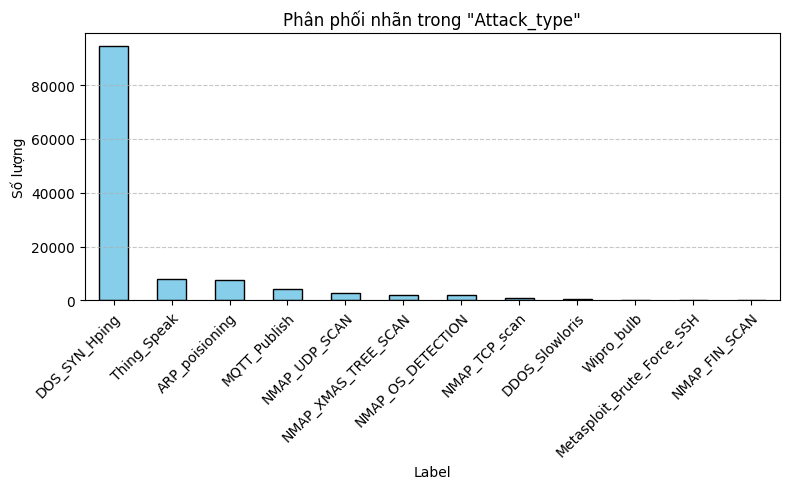

,Count,Percentage (%)
Attack_type,,
DOS_SYN_Hping,94659,76.89
Thing_Speak,8108,6.59
ARP_poisioning,7750,6.29
MQTT_Publish,4146,3.37
NMAP_UDP_SCAN,2590,2.10
NMAP_XMAS_TREE_SCAN,2010,1.63
NMAP_OS_DETECTION,2000,1.62
NMAP_TCP_scan,1002,0.81
DDOS_Slowloris,534,0.43


In [22]:
utils.label_stats_plot(data, 'Attack_type')

In [23]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [24]:
data = Preprocessing.delete_columns(data, ["Unnamed: 0",'service'])
# data = data.loc[:, data.columns.notna()]

data = Preprocessing.delete_columns(data, ['service'])
data = Preprocessing.one_hot_encode(data, ['proto'])
data = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...      idle.max      idle.tot      idle.avg  idle.std  \
0           0.437341  .

In [25]:
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
# X, _ = Preprocessing.scale_data(X)

In [26]:
# DataProcessing.shap_ex(X_train, y_train, X_test)

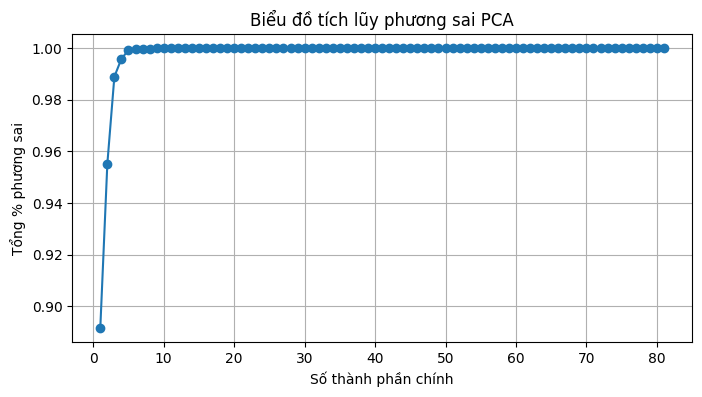

(                 PC1           PC2
 0       4.656752e+07 -1.462060e+07
 1       4.644131e+07 -1.469347e+07
 2       4.675222e+07 -1.469111e+07
 3       4.656332e+07 -1.472687e+07
 4       4.645993e+07 -1.464652e+07
 ...              ...           ...
 123112 -6.486354e+06  1.783632e+04
 123113 -6.486347e+06  1.782896e+04
 123114 -6.486354e+06  1.783632e+04
 123115 -6.486354e+06  1.783632e+04
 123116 -6.486354e+06  1.783632e+04
 
 [123117 rows x 2 columns],
 array([0.89144373, 0.06372489]))

In [27]:
DataProcessing.pca_analysis(X, n_components=2, plot=True)


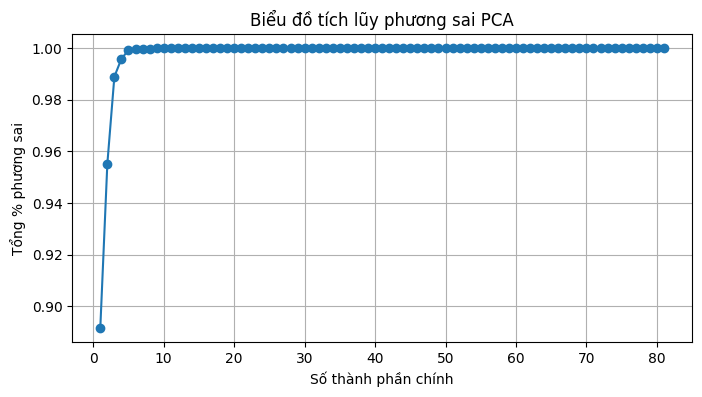

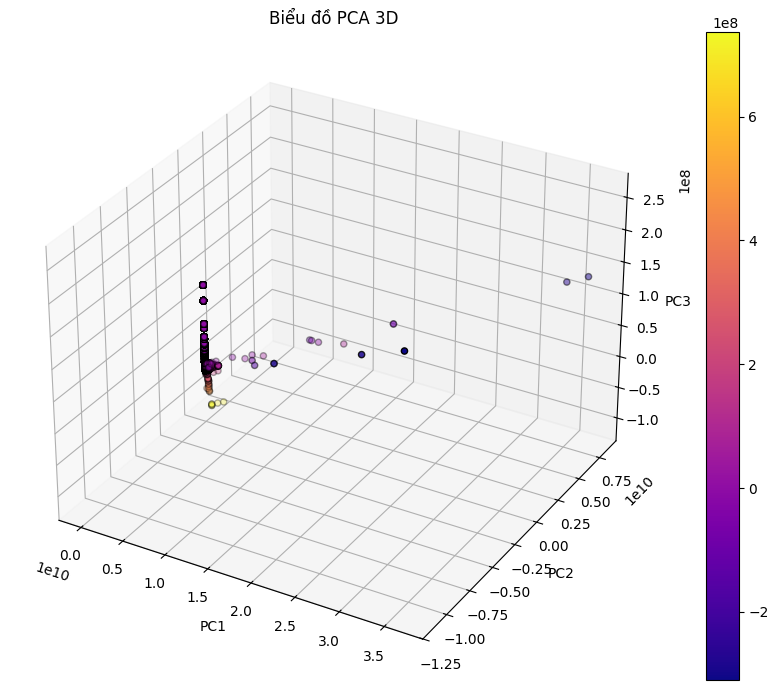

In [28]:
X_pca,_ = DataProcessing.pca_analysis(X, n_components=4, plot=True)
DataProcessing.plot_pca_4d(X_pca.values, y=None, title="Biểu đồ PCA 3D")

In [29]:
# Preprocessing.plot_heatmap(X_train[list['Feature']], y_train,'Attack_type')
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train[list['Feature']], threshold=0.8)

NameError: name 'X_train' is not defined

In [ ]:
Preprocessing.plot_heatmap(X[list['Feature']].drop(dropped_columns, axis=1), y,'Attack_type')

NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def group_statistics_analysis(df, features, group_by_col, output_dir='stats_output'):
    """
    Hàm thực hiện thống kê nhóm trên dataframe, phân tích các đặc trưng theo cột nhóm.
    
    Parameters:
    - df (pd.DataFrame): Dataframe chứa dữ liệu (ví dụ: RT-IoT2022).
    - features (list): Danh sách các cột đặc trưng để phân tích (ví dụ: ['fwd_pkts_tot', 'flow_duration']).
    - group_by_col (str): Tên cột để nhóm dữ liệu (ví dụ: 'Attack_type').
    - output_dir (str): Thư mục lưu kết quả (mặc định: 'stats_output').
    
    Returns:
    - None: In kết quả, vẽ biểu đồ, và lưu file CSV.
    """
    # 1. Kiểm tra dữ liệu đầu vào
    if not all(feat in df.columns for feat in features):
        raise ValueError("Một hoặc nhiều đặc trưng không tồn tại trong dataframe.")
    if group_by_col not in df.columns:
        raise ValueError(f"Cột {group_by_col} không tồn tại trong dataframe.")
    
    print("Kiểm tra giá trị khuyết:")
    print(df[features + [group_by_col]].isnull().sum())
    
    # Tạo thư mục đầu ra nếu chưa tồn tại
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 2. Thống kê nhóm cho từng đặc trưng
    for feat in features:
        print(f"\n=== Phân tích đặc trưng: {feat} ===")
        
        # Trung bình
        group_mean = df.groupby(group_by_col)[feat].mean()
        print(f"\nTrung bình {feat} theo {group_by_col}:")
        print(group_mean)
        
        # Trung vị
        group_median = df.groupby(group_by_col)[feat].median()
        print(f"\nTrung vị {feat} theo {group_by_col}:")
        print(group_median)
        
        # Thống kê chi tiết
        group_stats = df.groupby(group_by_col)[feat].describe()
        print(f"\nThống kê chi tiết {feat} theo {group_by_col}:")
        print(group_stats)
        
        # Lưu thống kê chi tiết
        group_stats.to_csv(os.path.join(output_dir, f'{feat}_stats.csv'))
        print(f"\nĐã lưu thống kê vào {output_dir}/{feat}_stats.csv")
        
        # 3. Trực quan hóa
        # Biểu đồ cột cho trung bình
        plt.figure(figsize=(10, 6))
        sns.barplot(x=group_mean.index, y=group_mean.values)
        plt.title(f'Trung bình {feat} theo {group_by_col}')
        plt.xlabel(group_by_col)
        plt.ylabel(f'Trung bình {feat}')
        plt.xticks(rotation=45)
        plt.yscale('log')  # Dùng log-scale để xử lý giá trị lớn
        plt.savefig(os.path.join(output_dir, f'{feat}_mean_barplot.png'))
        # plt.show()
        
        # Boxplot cho phân bố
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=group_by_col, y=feat, data=df)
        plt.title(f'Phân bố {feat} theo {group_by_col}')
        plt.xlabel(group_by_col)
        plt.ylabel(feat)
        plt.xticks(rotation=45)
        plt.yscale('log')  # Dùng log-scale để dễ quan sát
        plt.savefig(os.path.join(output_dir, f'{feat}_boxplot.png'))
        # plt.show()
    
    # 4. Thống kê nhóm cho nhiều đặc trưng
    group_multi = df.groupby(group_by_col)[features].agg(['mean', 'median', 'std'])
    print("\nThống kê nhiều đặc trưng theo {}:".format(group_by_col))
    print(group_multi)
    
    # Lưu thống kê nhiều đặc trưng
    group_multi.to_csv(os.path.join(output_dir, 'multi_features_stats.csv'))
    print(f"\nĐã lưu thống kê nhiều đặc trưng vào {output_dir}/multi_features_stats.csv")
    
    # 5. Phân tích mẫu hình
    print("\n=== Phân tích mẫu hình ===")
    for feat in features:
        max_mean_group = group_mean.idxmax() if feat in group_mean else None
        min_mean_group = group_mean.idxmin() if feat in group_mean else None
        print(f"- {feat}: Nhóm {max_mean_group} có trung bình cao nhất, nhóm {min_mean_group} thấp nhất.")
        if 'fwd_pkts_tot' == feat:
            print(f"  => Mẫu hình: {feat} cao thường liên quan đến {max_mean_group} (tấn công mạnh).")
        if 'flow_duration' == feat:
            print(f"  => Mẫu hình: {feat} thấp có thể liên quan đến tấn công nhanh như DDoS.")
        if 'pkt_len_avg' == feat:
            print(f"  => Mẫu hình: {feat} cao có thể do gửi gói tin lớn trong tấn công.")

# Ví dụ sử dụng
if __name__ == "__main__":
    # Đọc dữ liệu RT-IoT2022
    try:
        data = pd.read_csv('../data/RT_IOT2022')
        
        # Danh sách đặc trưng
#         features = [
#     'flow_duration',
#     'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std',
#     'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg', 'bwd_iat.std',
#     'flow_iat.min', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std',
#     'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std',
#     'idle.min', 'idle.max', 'idle.tot', 'idle.avg', 'idle.std',
#     'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
#     'payload_bytes_per_second'
# ]
        features = [
    "fwd_pkts_tot", "bwd_pkts_tot", "fwd_data_pkts_tot", "bwd_data_pkts_tot",
    "fwd_pkts_per_sec", "bwd_pkts_per_sec", "flow_pkts_per_sec",
    "fwd_subflow_pkts", "bwd_subflow_pkts"
]
        # Gọi hàm
        group_statistics_analysis(
            df=data,
            features=features,
            group_by_col='Attack_type',
            output_dir='stats_output'
        )
    except FileNotFoundError:
        print("File RT_IoT2022.csv không tìm thấy. Vui lòng kiểm tra đường dẫn.")

Kiểm tra giá trị khuyết:
fwd_pkts_tot         0
bwd_pkts_tot         0
fwd_data_pkts_tot    0
bwd_data_pkts_tot    0
fwd_pkts_per_sec     0
bwd_pkts_per_sec     0
flow_pkts_per_sec    0
fwd_subflow_pkts     0
bwd_subflow_pkts     0
Attack_type          0
dtype: int64

=== Phân tích đặc trưng: fwd_pkts_tot ===

Trung bình fwd_pkts_tot theo Attack_type:
Attack_type
ARP_poisioning                 8.296903
DDOS_Slowloris                 6.041199
DOS_SYN_Hping                  1.000000
MQTT_Publish                  10.171973
Metasploit_Brute_Force_SSH    12.216216
NMAP_FIN_SCAN                  1.214286
NMAP_OS_DETECTION              1.000000
NMAP_TCP_scan                  1.009980
NMAP_UDP_SCAN                  2.069884
NMAP_XMAS_TREE_SCAN            1.003483
Thing_Speak                    5.392452
Wipro_bulb                    80.529644
Name: fwd_pkts_tot, dtype: float64

Trung vị fwd_pkts_tot theo Attack_type:
Attack_type
ARP_poisioning                 2.0
DDOS_Slowloris                 

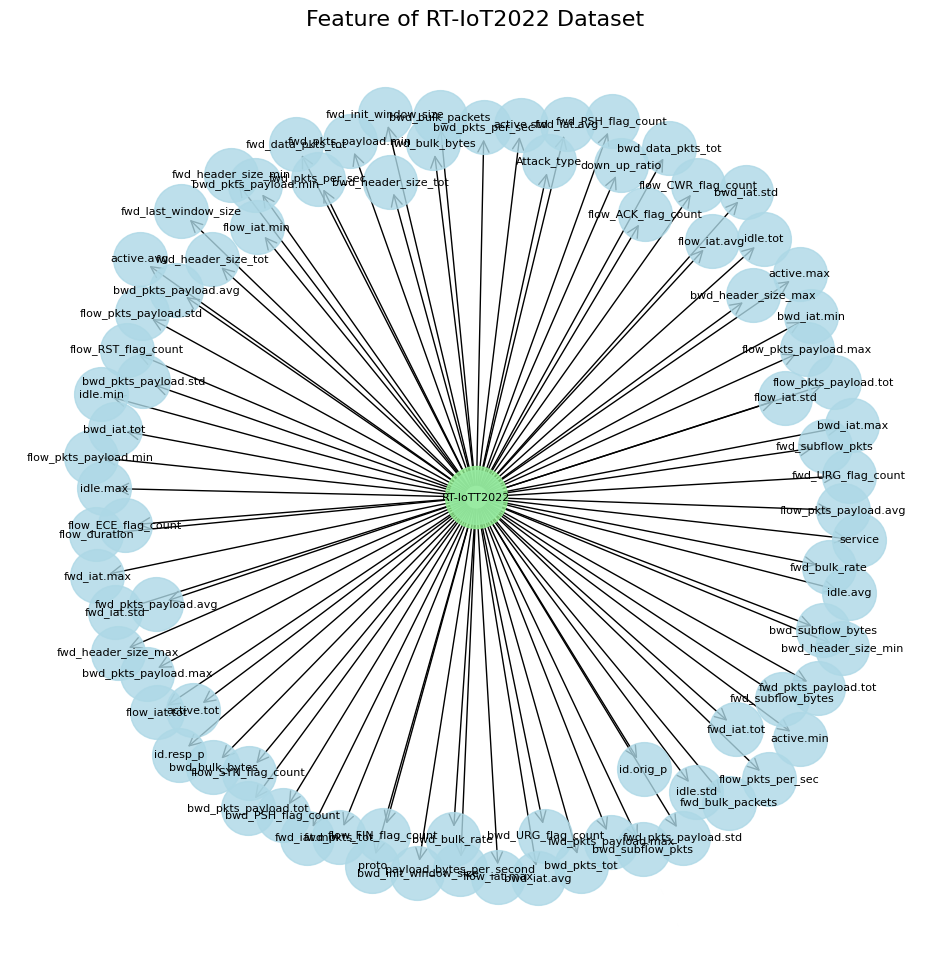

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Tạo đồ thị
G = nx.DiGraph()

# Thêm node trung tâm
central_node = "RT-IoTT2022"
G.add_node(central_node)

# Thêm các node xung quanh với tên thuộc tính
attributes = ['id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.min',
       'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std',
       'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg',
       'bwd_iat.std', 'flow_iat.min', 'flow_iat.max', 'flow_iat.tot',
       'flow_iat.avg', 'flow_iat.std', 'payload_bytes_per_second',
       'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes',
       'bwd_subflow_bytes', 'fwd_bulk_bytes', 'bwd_bulk_bytes',
       'fwd_bulk_packets', 'bwd_bulk_packets', 'fwd_bulk_rate',
       'bwd_bulk_rate', 'active.min', 'active.max', 'active.tot', 'active.avg',
       'active.std', 'idle.min', 'idle.max', 'idle.tot', 'idle.avg',
       'idle.std', 'fwd_init_window_size', 'bwd_init_window_size',
       'fwd_last_window_size', 'Attack_type']

# Thêm các node và edge
for attr in attributes:
    G.add_node(attr)
    G.add_edge(central_node, attr)

# Vẽ đồ thị
pos = nx.spring_layout(G)  # Tự động sắp xếp vị trí node
plt.figure(figsize=(12, 12))

# Vẽ node
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500, alpha=0.8, node_shape='o')
nx.draw_networkx_nodes(G, pos, nodelist=[central_node], node_color='lightgreen', node_size=2000, alpha=0.8)

# Vẽ edge
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

# Thêm label cho node
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=8)

plt.title("Feature of RT-IoT2022 Dataset", fontsize=16)
plt.axis('off')
plt.show()